# 손동작 분류 경진대회 EDA 

안녕하세요! 손동작 분류 경진대회로 돌아온 데이콘 Basic 입니다!

이번 대회는 주어진 센서 데이터를 통해 손동작(target)을 분류하는 대회입니다.

target은 총 4개의 class 로 이루어져 있습니다. 

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

# 패키지 설치
EDA를 시작하기에 앞서 필요한 패키지들을 설치합니다.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

# 데이터 불러오기


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 코랩 드라이브를 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('/content/drive/MyDrive/yeardream/train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)

data # 데이터를 확인합니다.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,...,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2331,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,...,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2332,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,...,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3
2333,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,-1.881519,...,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426,1


In [7]:
# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
test = pd.read_csv('/content/drive/MyDrive/yeardream/test.csv')

# id 는 제외하고 분석합니다.
test = test.drop('id', axis=1)

test # 데이터를 확인합니다.

# train data가 2335개의 row임에 비해, test data가 9342 row.
# 성능이 과포화되는 것을 막기 위해 train data를 극단적으로 줄인 것으로 생각됨.

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,7.963652,7.973099,12.877346,11.015341,-0.963491,-3.926525,-30.875620,6.022538,-1.934085,-2.019713,...,-6.913374,-28.872380,-0.822110,3.043326,11.113028,11.160472,2.034703,-0.056564,-3.959809,22.986533
9339,-7.974772,0.997146,8.011316,-10.007376,1.065419,-15.090632,1.916883,-2.981494,2.948488,12.012327,...,0.972399,-4.158987,-4.971529,-9.957906,19.081232,-3.056299,-0.714567,-0.859710,7.950773,2.952029
9340,4.035916,-10.138330,5.943174,8.080807,28.007780,4.981148,23.084630,-30.048268,9.877151,-2.048269,...,-11.013990,-26.176325,23.143486,4.913298,25.066640,4.044110,-1.948533,1.921691,13.952396,11.866490
9341,8.920498,0.033165,20.058309,68.132886,4.037498,19.068331,-4.109146,-4.067740,-11.044263,1.134035,...,-7.072355,-18.864597,2.902505,-13.936057,3.058599,33.004942,2.932643,9.968502,-3.097104,7.966220


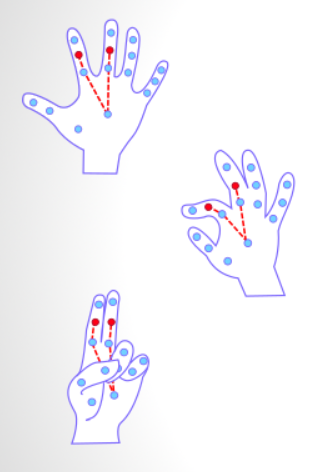

In [6]:
from IPython.display import Image
Image('/content/drive/MyDrive/yeardream/손동작.png')
 
 # data 내의 32개 column은 아래 이미지와 같이 손바닥, 5개 손가락의 root, mid, tip의 총 16개 지점의 x, y 좌료를 뜻하는 것으로 생각됨
 # 어떤 column이 x, y 좌표에 해당하는지는 시각화해서 확인해볼 것
 # baseline에서 사용한 모델은 tree 기반의 RandomForest이기 때문에, scaling이 필요 없지만
 # 다른 모델을 사용할 경우 동일 row 내의 x 좌표들끼리, 또한 동일 row 내의 y 좌표들끼리 scaling해주는게 좋을 것 

# 결측치 확인
결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [ ]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0  # 결측치가 하나라도 존재하는 column의 갯수
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())  # 해당 column 내 결측치의 갯수
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)


결측치가 존재하지 않습니다


결측치가 존재하지 않습니다! 

별도의 결측치 처리는 하지 않아도 됩니다.

# 기초 통계 분석
이제 본격적으로 우리가 가진 데이터를 분석 해보도록 하겠습니다!

주어진 데이터를 기초 통계량이라는 숫자로 요약하고 확인해보겠습니다.

In [ ]:
# 기초 통계량을 살펴봅니다.
data.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,...,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,...,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,...,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,...,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,...,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,...,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,...,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959622,3.000000


# 데이터 시각화
Box plot 을 이용해서 수치형 데이터를 시각화합니다.

In [6]:
# 이용가능한 스타일의 종류 확인
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

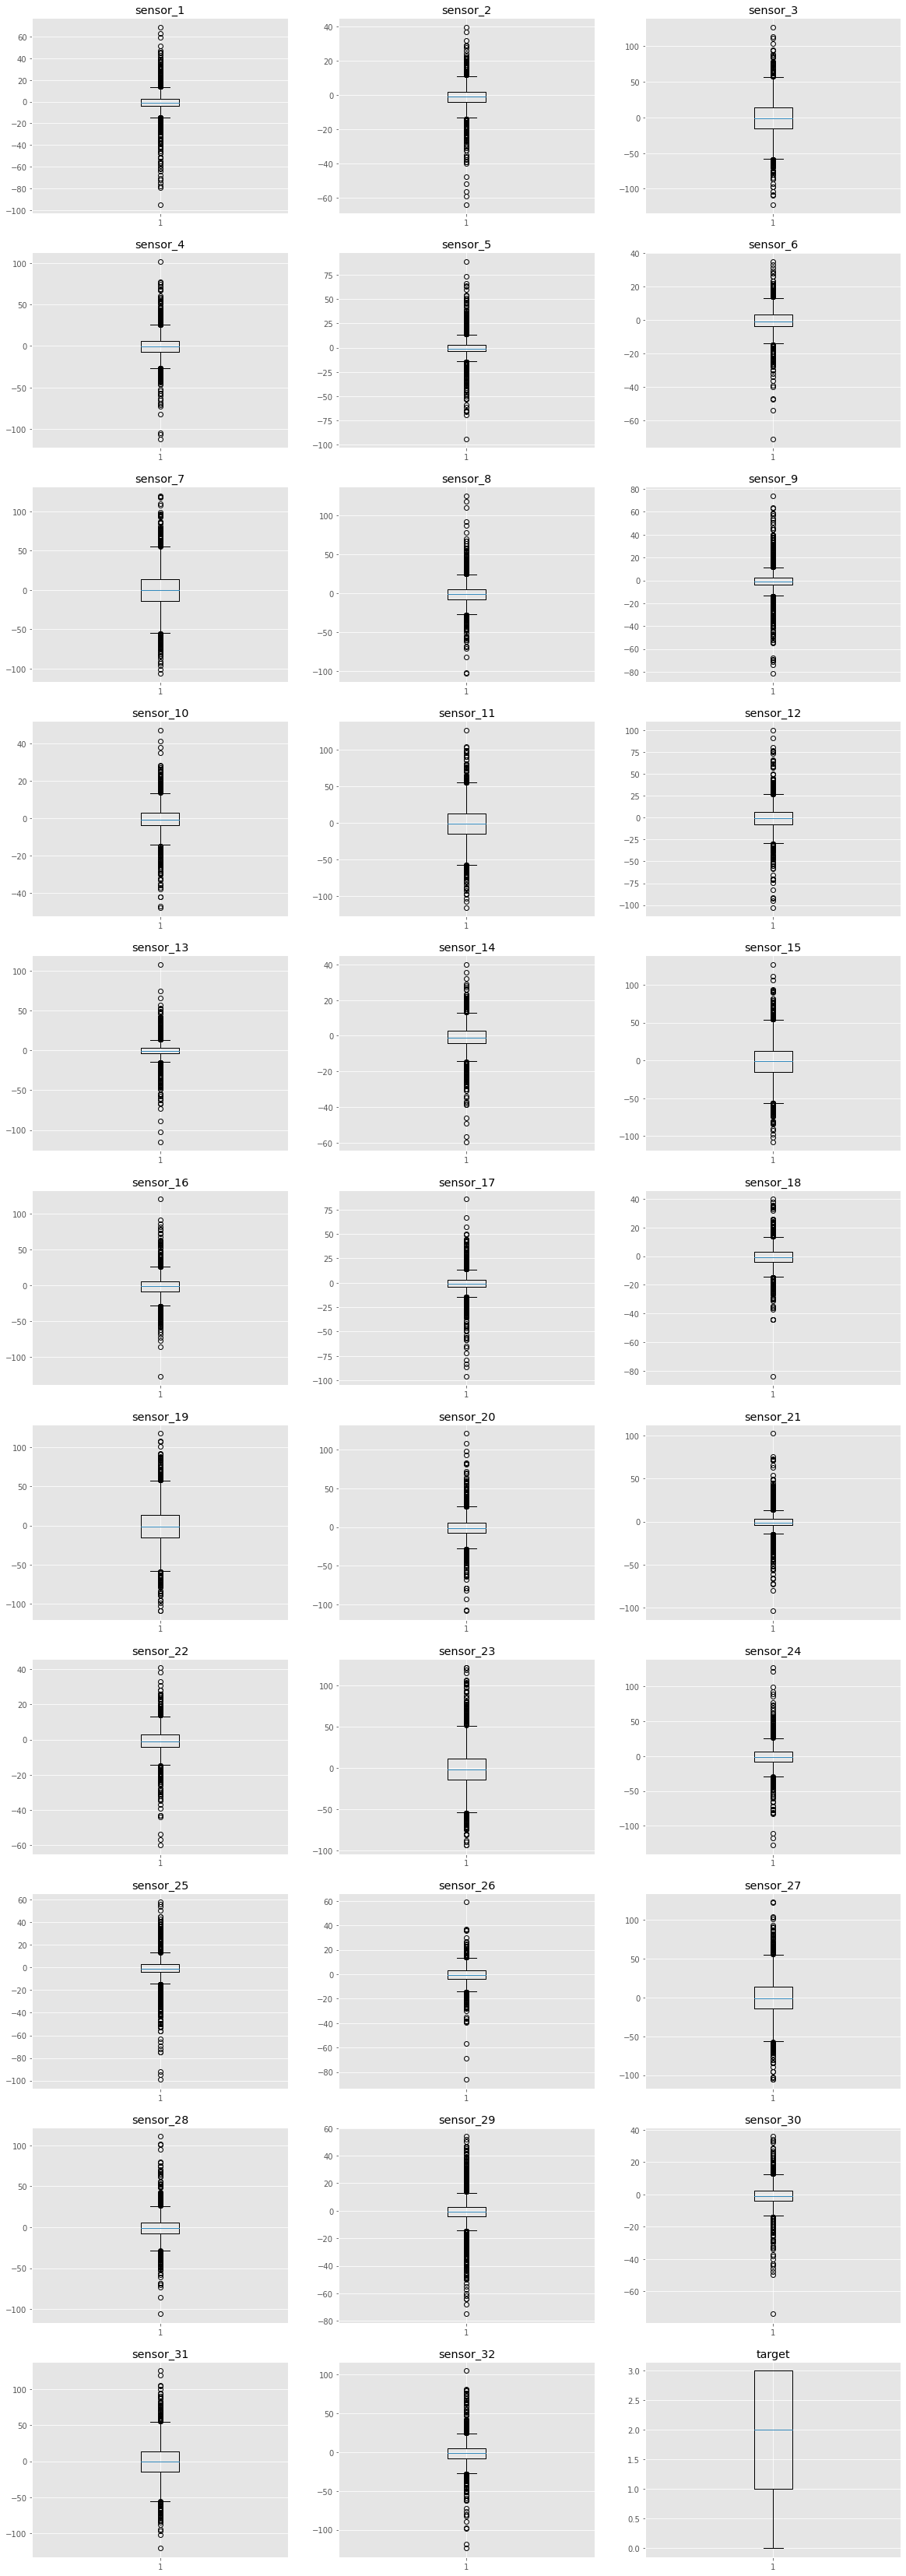

In [ ]:
plt.style.use("ggplot")

feature = data.columns
# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,60))

for i in range(len(feature)):
    plt.subplot(11,3,i+1)
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()

# 상관관계 시각화
feature들 간의 상관관계를 살펴보는 것은 분석에 많은 도움이 됩니다.

먼저 전체 feature들 간의 상관관계를 살펴본 뒤

주요 feature와 타겟 feature의 상관관계를 산점도를 통해 살펴보겠습니다.

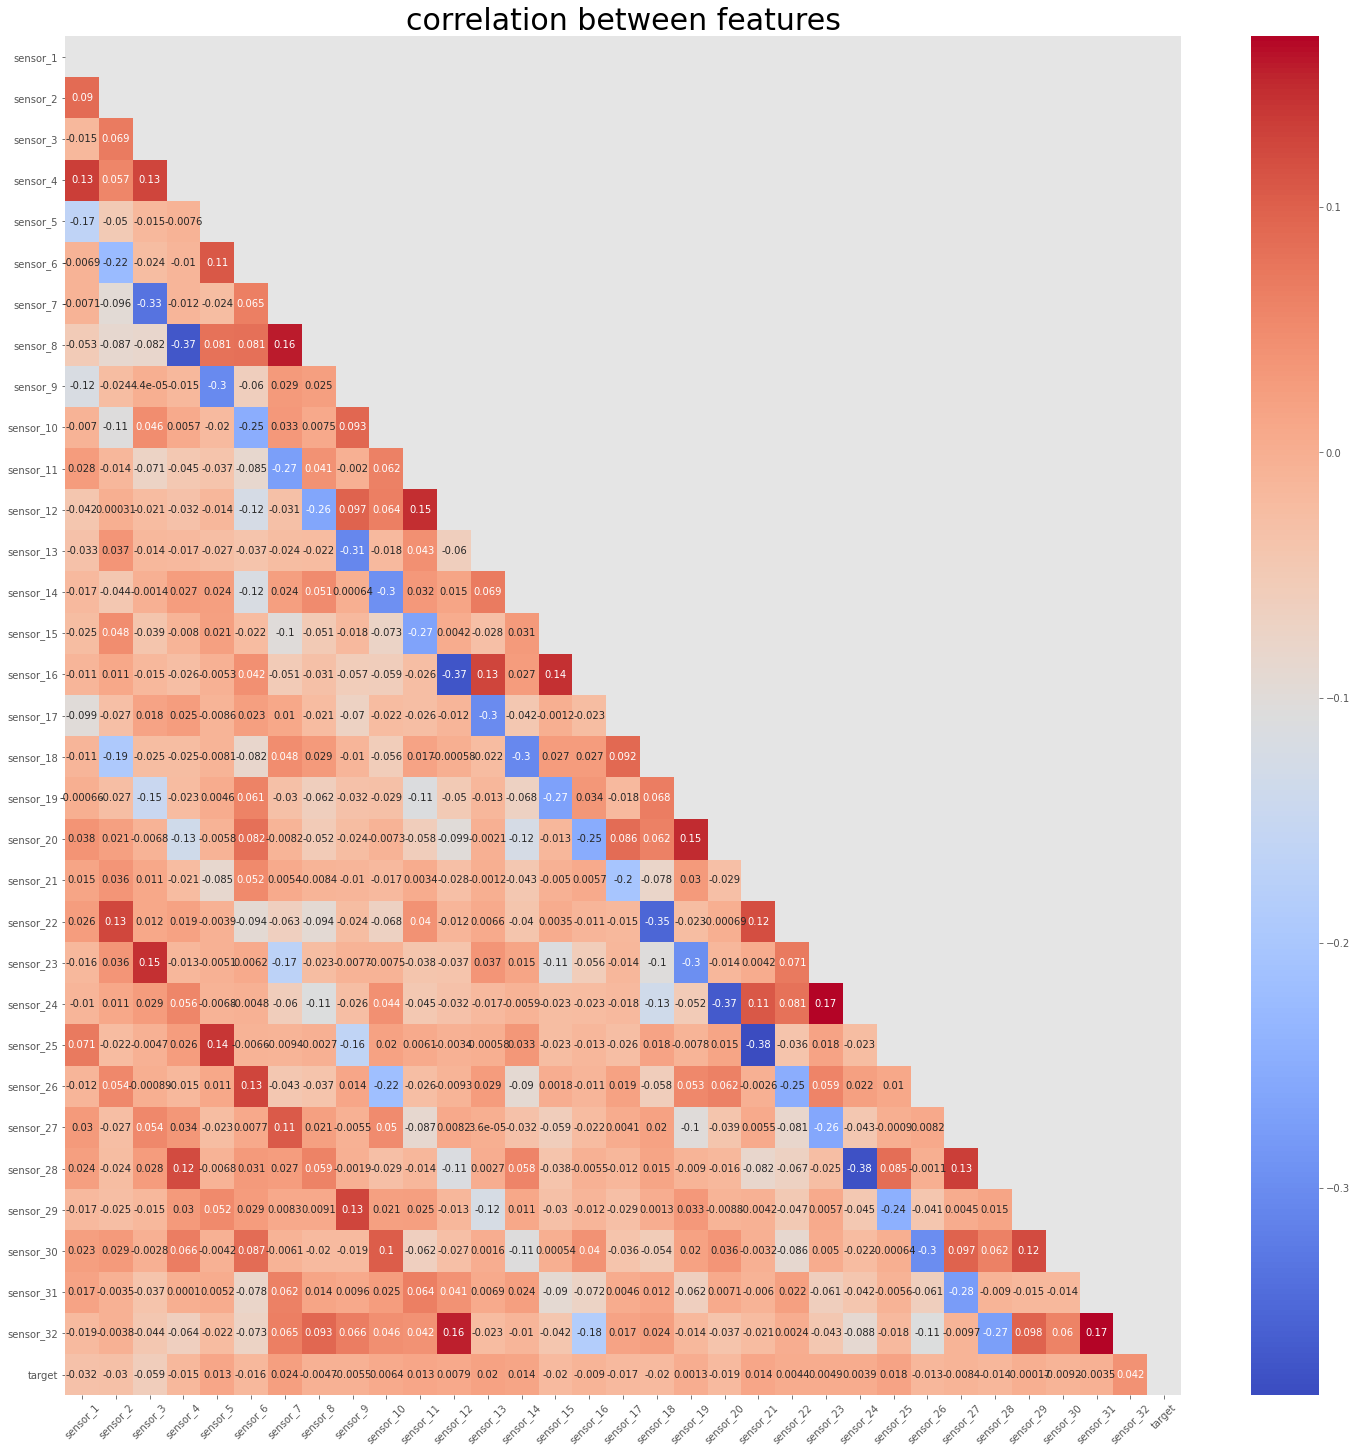

In [ ]:
plt.figure(figsize=(25,25))

heat_table = data.corr()

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True

heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')  # annot 각 블록 안에 상관계수 값을 적을지 여부  # mask : 삼각형 형태의 mask를 씌울지 여부 
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=10, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=10)
plt.title('correlation between features', fontsize=30)
plt.show()

# Target과 다른 feature들과의 관계
상관 분석을 통해 얻은 결과를 좀 더 자세하게 살펴보겠습니다.

In [ ]:
target = "target"

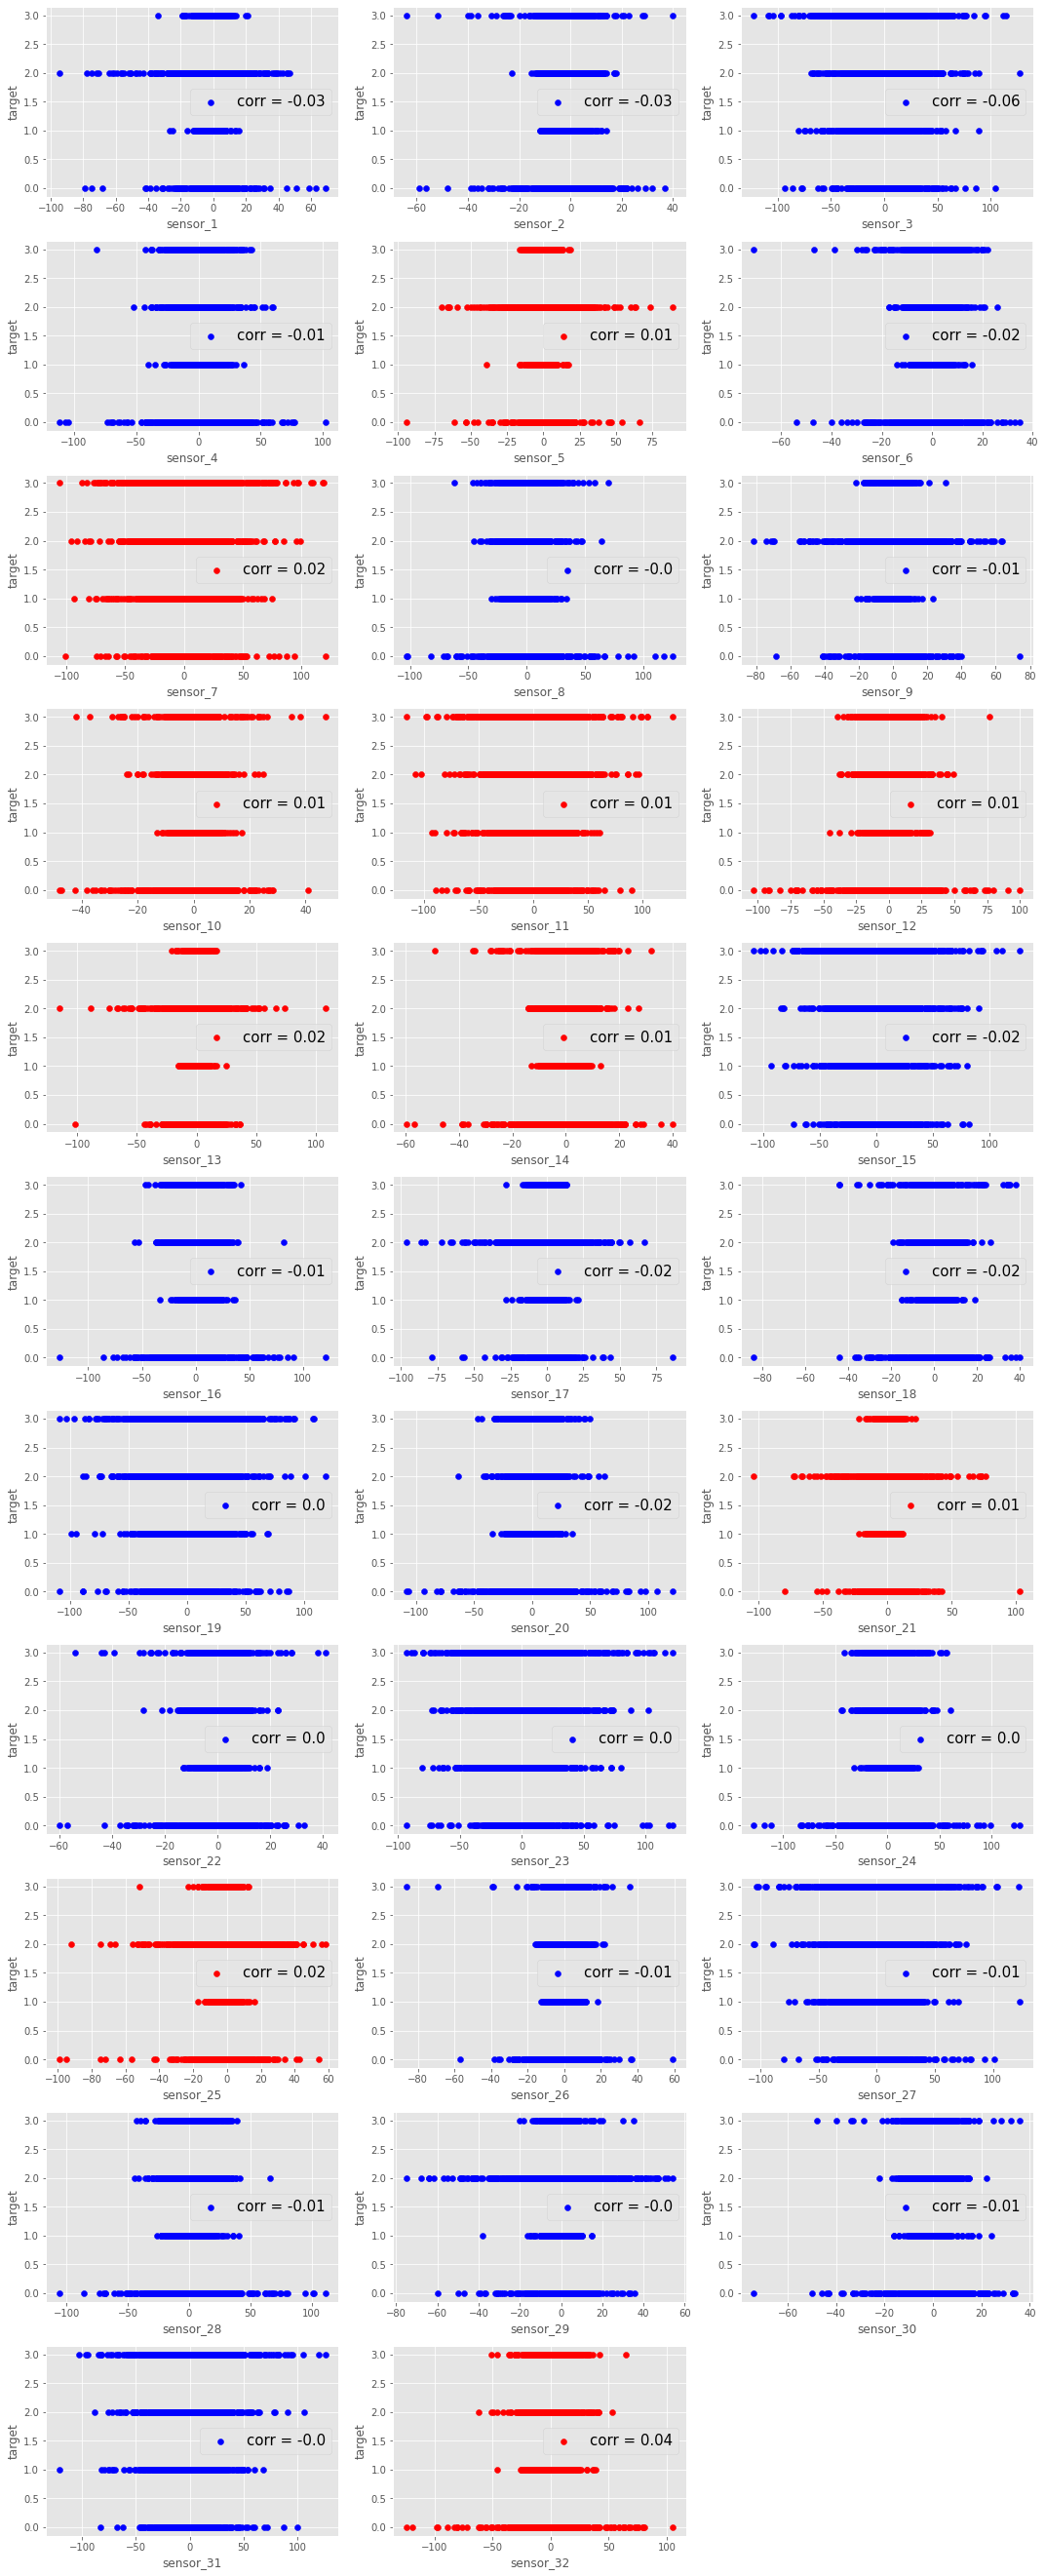

In [ ]:
feature = data.columns

plt.figure(figsize=(15,40))

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(11,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data[feature[i]], data[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()